# Task # 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

Q:What will be predicted score if a student study for 9.25 hrs in a
day?


## Importing all needed libraries

In [2]:
# Importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading data

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
#data shape
df.shape

(25, 2)

## Histograms

[]

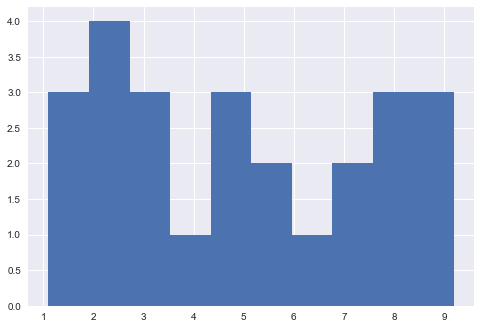

In [39]:
df.Hours.hist()
plt.plot()

[]

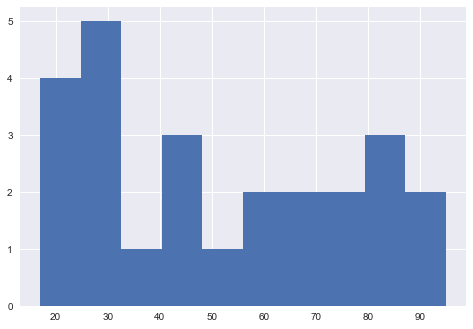

In [40]:
df.Scores.hist()
plt.plot()

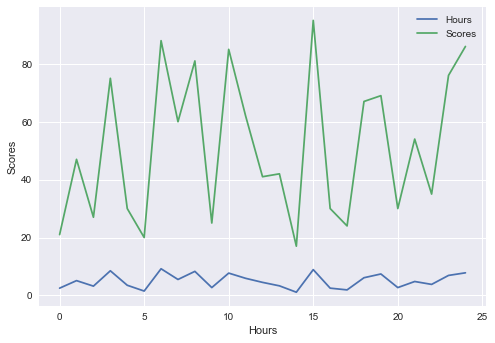

In [38]:
import seaborn as sns
plt.style.use('seaborn')
plt.plot(df['Hours'],label='Hours')
plt.plot(df['Scores'],label='Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

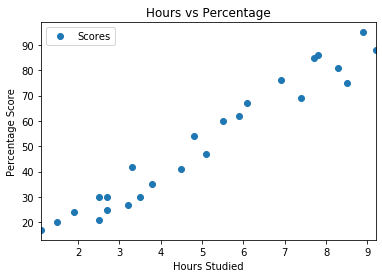

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

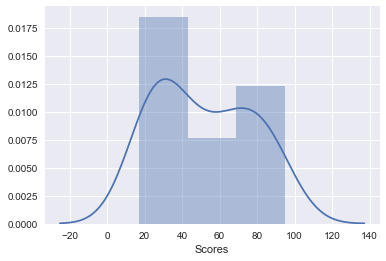

In [45]:
sns.distplot(df['Scores'])

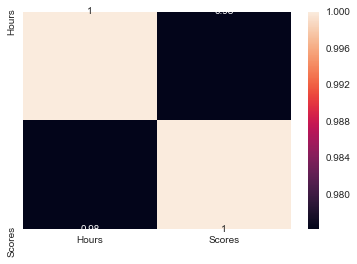

In [41]:
#correlations
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(),annot=True)

## dividing the data

In [8]:
# dividing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

## split the data into 80% and 20%

In [10]:
#split the data into training 80% and test sets 20%
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Fit the model

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Plotting the regression line

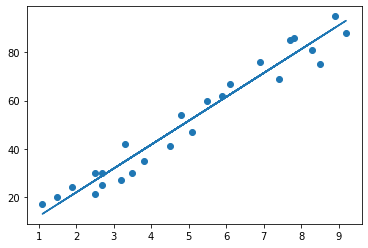

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
# Testing data - In Hours
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Predicting the scores

In [19]:
# Predicting the scores
y_pred = regressor.predict(X_test) 

In [24]:
# Comparing Actual vs Predicted
Predicted_data= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Predicted_data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
# You can also test with your own data
hours = [[9.25]]
 
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Accuracy

In [47]:
#Accuracy
Accuracy = round(regressor.score(X_train,y_train)*100,2)
print(Accuracy)

95.16


## Mean Absolute Error

In [48]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
